# 1. Clasificación Binaria 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# 1. Carga del dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [4]:
# 2. Normalizar/estandarizar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# 3. Construcción de la red neuronal
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Salida binaria

c:\Users\Felipe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 4. Compilación del modelo
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
# 5. Entrenamiento
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4942 - loss: 0.7209 - val_accuracy: 0.6739 - val_loss: 0.6232
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7505 - loss: 0.6000 - val_accuracy: 0.8043 - val_loss: 0.5346
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8413 - loss: 0.5219 - val_accuracy: 0.8478 - val_loss: 0.4535
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9150 - loss: 0.4474 - val_accuracy: 0.8478 - val_loss: 0.3826
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9147 - loss: 0.3866 - val_accuracy: 0.8478 - val_loss: 0.3263
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9371 - loss: 0.3245 - val_accuracy: 0.8696 - val_loss: 0.2827
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9619 - loss: 0.2646 - val_accuracy: 0.8696 - val_loss: 0.2492
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9517 - loss: 0.2538 - val_accuracy: 0.8696 - val_lo

In [8]:
# 6. Evaluación
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Exactitud en test: {accuracy:.4f}")

Exactitud en test: 0.9825


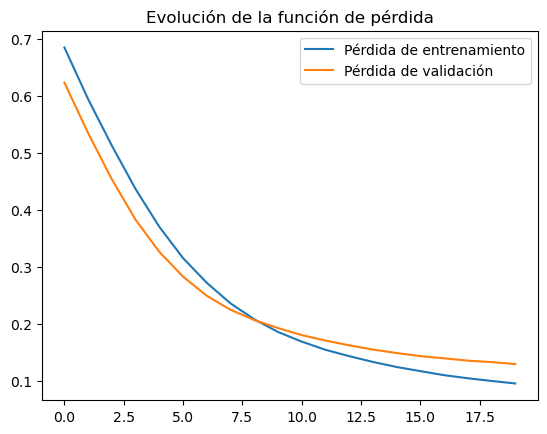

In [9]:
# 7. Curvas de aprendizaje (opcional)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.title("Evolución de la función de pérdida")
plt.show()

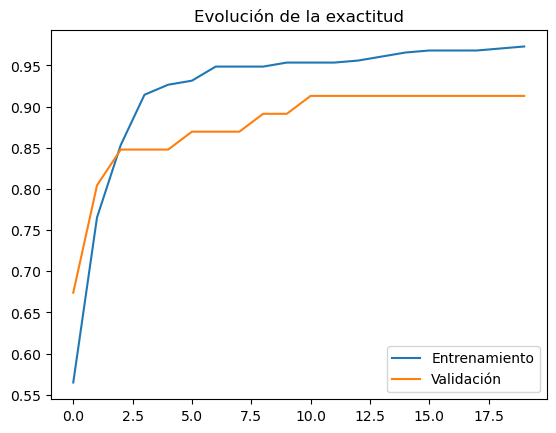

In [10]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.legend()
plt.title("Evolución de la exactitud")
plt.show()

In [11]:
# 8. Predicciones
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:10].T)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[1 0 0 1 1 0 0 0 0 1]]


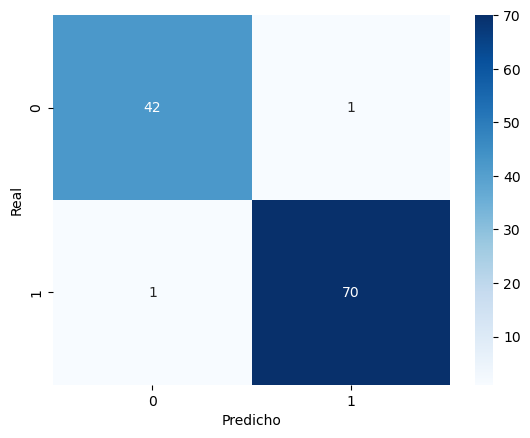

In [12]:
# 9. Evaluación de métricas
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [14]:
# 10. Guardar el modelo
model.save('modelo_cancer.h5')

# Para cargarlo:
model = tf.keras.models.load_model('modelo_cancer.h5')


# 2. Clasificación Multiclase

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
# 1. Carga del dataset de Iris
iris = load_iris()
X = iris.data  # 4 características
y = iris.target  # 3 clases: 0,1,2

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [17]:
# 2. Estandarizar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# 3. Convertir las etiquetas a one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [19]:
# 4. Construir la red
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 neuronas de salida (3 clases)

c:\Users\Felipe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# 5. Compilar el modelo
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [21]:
# 6. Entrenar
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=8, 
    validation_split=0.1, 
    verbose=1
)

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.1106 - loss: 1.7008 - val_accuracy: 0.2500 - val_loss: 1.1712
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0833 - loss: 1.4679 - val_accuracy: 0.2500 - val_loss: 1.1037
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1269 - loss: 1.3823 - val_accuracy: 0.2500 - val_loss: 1.0436
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1607 - loss: 1.2443 - val_accuracy: 0.4167 - val_loss: 0.9907
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3166 - loss: 1.1008 - val_accuracy: 0.5833 - val_loss: 0.9433
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5039 - loss: 1.0182 - val_accuracy: 0.5833 - val_loss: 0.9055
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6383 - loss: 0.9211 - val_accuracy: 0.6667 - val_loss: 0.8679
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6933 - loss: 0.8612 - val_accuracy: 0.7500 - val_lo

In [22]:
# 7. Evaluar
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Exactitud en test: {accuracy:.4f}")

Exactitud en test: 1.0000


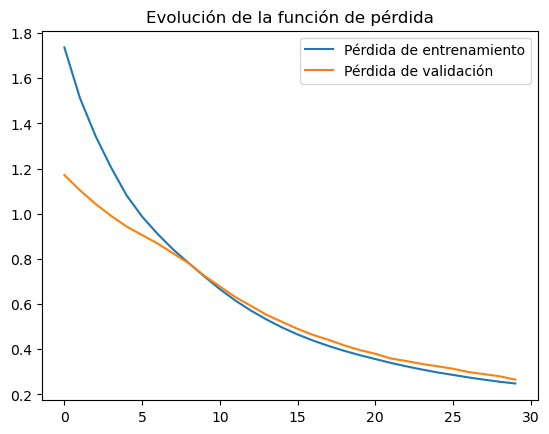

In [23]:
# 8. Curvas de aprendizaje
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.title("Evolución de la función de pérdida")
plt.show()

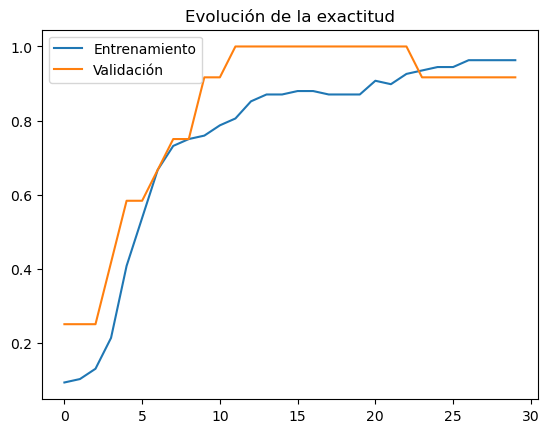

In [24]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.legend()
plt.title("Evolución de la exactitud")
plt.show()

In [25]:
# 9. Predicciones
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


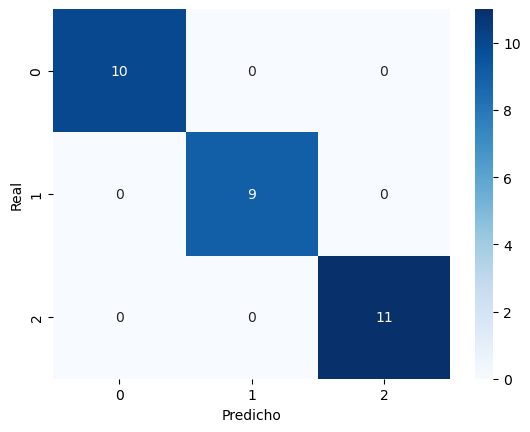

In [26]:
# 10. Evaluación de métricas
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [27]:
print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
# 11. Guardar el modelo
model.save('modelo_iris.h5')

# Para cargarlo:
model = tf.keras.models.load_model('modelo_iris.h5')

# Regresión

In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
# 1. Carga de datos (Boston Housing)
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [44]:
# 2. Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [45]:
# 3. Construcción del modelo de red neuronal
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Salida de una sola neurona (predicción numérica)

c:\Users\Felipe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# 4. Compilar el modelo
model.compile(
    optimizer='adam', 
    loss='mse',               # Error cuadrático medio
    metrics=['mae']           # Error absoluto medio
)

In [47]:
# 5. Entrenar
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 29144.0391 - mae: 151.7024 - val_loss: 27383.9277 - val_mae: 147.1851
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31197.3867 - mae: 157.3018 - val_loss: 27182.0723 - val_mae: 146.5161
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29373.0234 - mae: 152.2216 - val_loss: 26925.3828 - val_mae: 145.6637
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30475.2480 - mae: 156.4349 - val_loss: 26591.2109 - val_mae: 144.5786
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26978.8965 - mae: 144.3963 - val_loss: 26138.2539 - val_mae: 143.1087
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28868.0977 - mae: 151.2530 - val_loss: 25529.4551 - val_mae: 141.1234
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27069.2559 - mae: 146.4695 - val_loss: 24720.2812 - val_mae: 138.4858
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27346.3242 - mae: 145.9304 - val_loss: 23679.

In [48]:
# 6. Evaluar
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Error cuadrático medio en test: {loss:.4f}")
print(f"Error absoluto medio en test: {mae:.4f}")

Error cuadrático medio en test: 3378.0471
Error absoluto medio en test: 45.9106


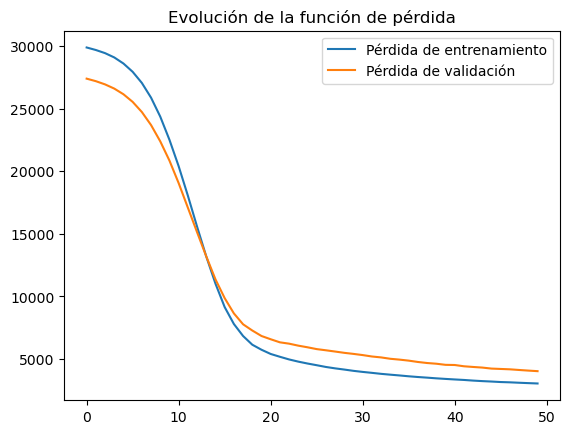

In [49]:
# 7. Curvas de aprendizaje
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.title("Evolución de la función de pérdida")
plt.show()

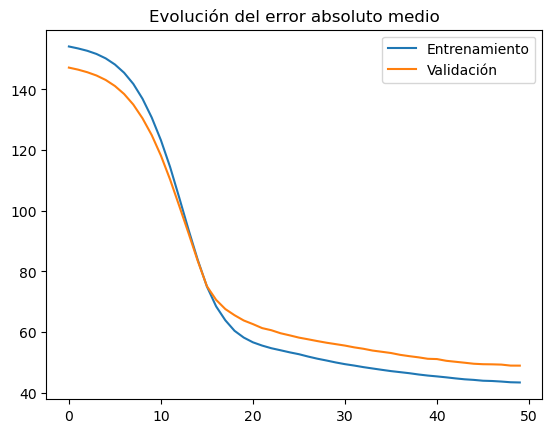

In [50]:
plt.plot(history.history['mae'], label='Entrenamiento')
plt.plot(history.history['val_mae'], label='Validación')
plt.legend()
plt.title("Evolución del error absoluto medio")
plt.show()

In [51]:
# 8. Predicciones
y_pred = model.predict(X_test)
print(y_pred[:10].T)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[134.19864  198.00084  132.78664  353.11923   77.372574  81.68386
  261.18506  177.65332   64.25339   50.446053]]


In [52]:
# 9. Evaluación de métricas
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rms = np.sqrt(mse)

print(f"Error cuadrático medio: {mse:.2f}")
print(f"Coeficiente de determinación R2: {r2:.2f}")
print(f"Raíz del error cuadrático medio: {rms:.2f}")

Error cuadrático medio: 3378.05
Coeficiente de determinación R2: 0.36
Raíz del error cuadrático medio: 58.12


In [ ]:
# 10. Guardar el modelo
model.save('modelo_diabetes.h5')

# Para cargarlo:
# model = tf.keras.models.load_model('modelo_diabetes.h5') No funciona no se porque